In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pickle
import os

data_file = 'data/mnist_digits_784.pkl'
# Check if data file exists
if os.path.isfile(data_file):
    # Load data from file
    with open(data_file, 'rb') as f:
        data = pickle.load(f)
else:
    # Fetch data from internet
    data = fetch_openml('mnist_784', version=1, parser='auto')
    # Save data to file
    with open(data_file, 'wb') as f:
        pickle.dump(data, f)
# Print the keys
print(data.keys())
# Print the shape of the data
print(data.data.shape)
print(data.target.shape)

# description of the data
print(data.DESCR)

# Print the unique labels
print(np.unique(data.target))
# Print the first few data points
print(data.data[:5])
# Extract data and labels
X, y = np.array(data.data).T, np.array(data.target).astype('int')
# Split data into training and test sets
# X_train, X_test = data.data[:60000], data.data[60000:]
# y_train, y_test = data.target[:60000], data.target[60000:]

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784)
(70000,)
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain 

In [2]:
# ---------------------------------------
def montage(A, m, n):
    '''
    Create a montage matrix with mn images
    Inputs:
    A: original pxN image matrix with N images (p pixels), N > mn
    m, n: m rows & n columns, total mn images
    Output:
    M: montage matrix containing mn images
    '''
    
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
                A[:, i*n+j].reshape(sz, sz)

    return M

In [3]:
def montage_v2(A, m, n):
# by 李晏丞
# 讀取所有圖片並串聯成montage
    sz = np.sqrt(A.shape[0]).astype("int")
    M = np.zeros((sz*m, sz*n))

    for i in range(m*n):
        # 找出新舊矩陣的關係
        row = (i // n) * sz # // 代表整數除法
        col = (i % n) * sz # % 代表取餘數
        M[row:row+sz, col:col+sz] = A[:, i].reshape(sz, sz)
    return M

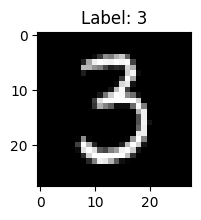

6958


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# label = mnist.target[1]
# data = mnist.data
# img = data.iloc[1,:]
i = 50
# print(y[i])
# img = X.iloc[:, i]
# sz = np.sqrt(len(img)).astype('int')
# plt.imshow(np.array(img).reshape(sz, sz), cmap='gray')
img = X[:, i]
sz = np.sqrt(len(img)).astype('int')
fig = plt.figure(figsize=(2, 2))
plt.imshow(img.reshape(sz, sz), cmap='gray')
plt.title(f"Label: {y[i]}")
plt.show()
print(sum(y==9))

<font color=yellow>Ask copliot to plot the first N images of images from the dataset</font>

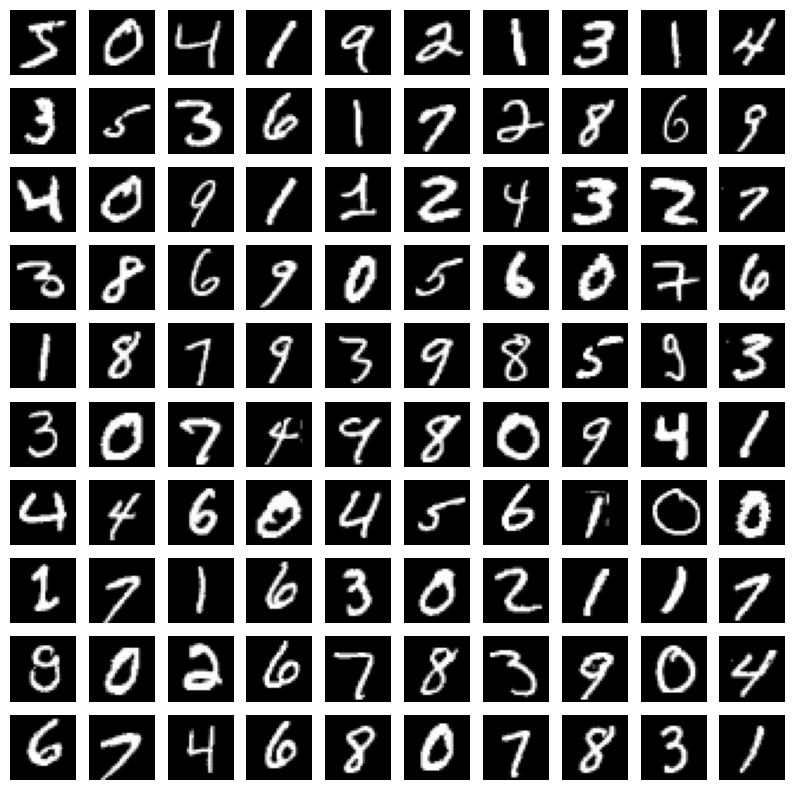

In [5]:
# Draw the first 100 images by subplot
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    ax[i//10, i%10].imshow(X[:, i].reshape(28, 28), cmap='gray')
    ax[i//10, i%10].axis('off')
plt.show()


<font color=yellow>Ask copilot to display a montage of the images in the training set. This will help you understand the data better.</font>

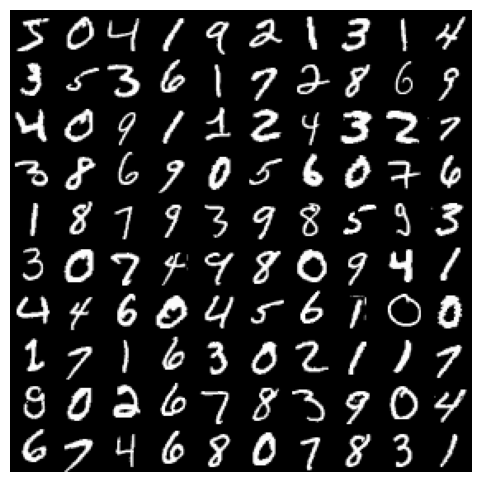

In [6]:
# Display the montage
M = montage(X, 10, 10)
plt.figure(figsize=(6, 6))
plt.imshow(M, cmap='gray')
plt.axis('off')
plt.show()

<font color=yellow>Draw N images from the dataset according to the label y</font>

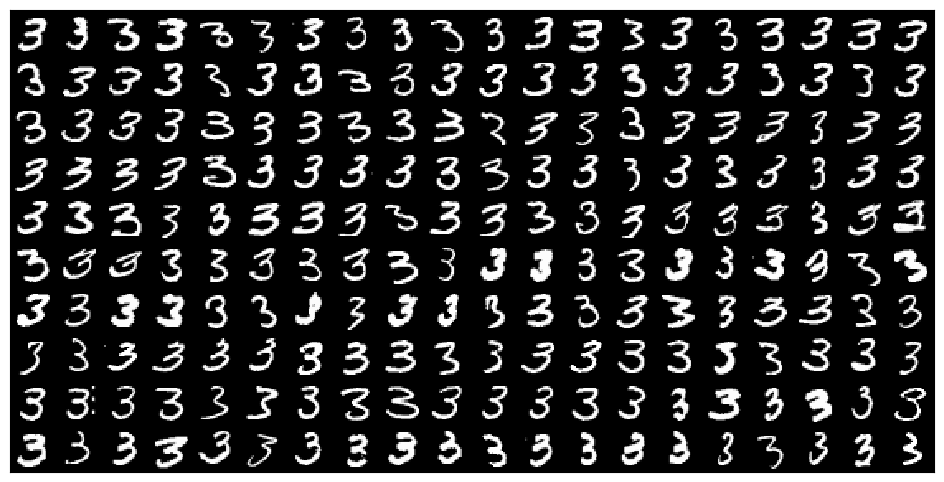

In [7]:
digit_to_show = 3
Digit = X[:, y==digit_to_show]
plt.figure(figsize = (12, 6))
m, n = 10, 20  # A m x n montage (total mn images)
M = montage(Digit, m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
# plt.imshow(M, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
# plt.title('The Montage of handwriting digits')
plt.show()


<font color=yellow>畫出講義中的圖片：圖 9</font>  

(7141, 784)


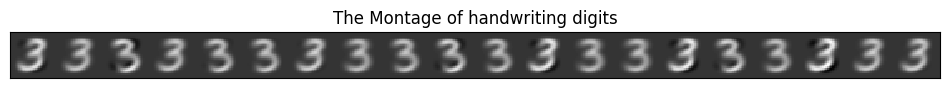

In [ ]:
# Do PCA on the data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

digit_to_show = 3
# Select the digit to show
Digit = X[:, y==digit_to_show].T
#q=1
#q = np.arange(1, 30, 2)
q = 30
pca = PCA(n_components=q)
pca.fit(Digit)
Z = pca.transform(Digit)
Digit_hat = pca.inverse_transform(Z)
print(Digit_hat.shape)

# Plot the data
plt.figure(figsize = (12, 6))
m, n = 1, 20  # A m x n montage (total mn images)
M = montage(Digit_hat.T, m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()
